In [58]:
!pip install pandas_datareader
!pip install quandl
!pip install alpha_vantage
!pip install yfinance

In [59]:
%matplotlib inline
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import quandl
import yfinance as yf
from urllib.request import urlopen
import json
import requests
from alpha_vantage.timeseries import TimeSeries

## Historical Data

Fetch historical data - 10 years for day-wise and 7 days for intraday.

In [60]:
#fetch data from the yahoo service
def fetch_yahoo(start,end,ticker='AAPL'):
    return data.get_data_yahoo(ticker,start,end)

#fetch data from quandl. available only till 2018-03-27
def fetch_quandl(start,end,ticker = 'AAPL'):
    Qapi  = 'ayVQB8PSP8Q_J6rB1nzU'
    return quandl.get('WIKI/'+ticker, start_date = start, end_date = end, api_key = Qapi)

#fetch data from alpha vintage. Per minute data available 
def fetch_alpvantage(ticker = 'AAPL'):
    AV_api = 'DL5FX58BUCJAXLSE'
    ts = TimeSeries(key=AV_api, output_format='pandas')
    intraday_data, data_info = ts.get_intraday(ticker, outputsize='full', interval='1min')
    print(data_info)
    return intraday_data

def fetch_alpvantage_daily(ticker = 'AAPL'):
    AV_api = 'DL5FX58BUCJAXLSE'
    ts = TimeSeries(key=AV_api, output_format='pandas')
    intraday_data, data_info = ts.get_daily(ticker, outputsize='full')
    print(data_info)
    return intraday_data

#fetch data from yfinance. variable interval data and variable period
def fetch_yfinance(ticker='AAPL',period='10y',interval='1m'):
    return yf.download(tickers=ticker,period=period,interval=interval)

In [61]:
start = '1980-01-01'
end = '2020-06-06'
ticker = 'AAPL'
dataq = fetch_quandl(start,end,ticker=ticker)
datay = fetch_yahoo(start,end,ticker=ticker)

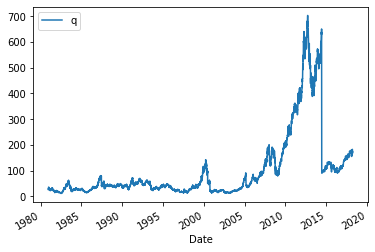

In [62]:
dataq['Open'].plot()
plt.legend('quandl')

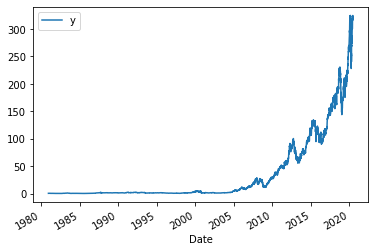

In [63]:
datay['Open'].plot()
plt.legend('yahoo')

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume', '2. Symbol': 'AAPL', '3. Last Refreshed': '2020-06-08 16:00:00', '4. Interval': '1min', '5. Output Size': 'Full size', '6. Time Zone': 'US/Eastern'}
{'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2020-06-08', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}


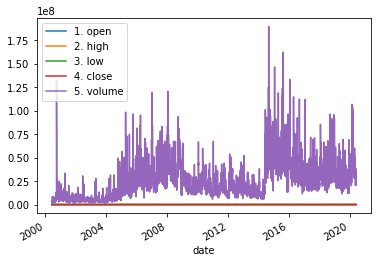

In [64]:
data_av = fetch_alpvantage('AAPL')
dataav = fetch_alpvantage_daily('AAPL')
dataav.plot()

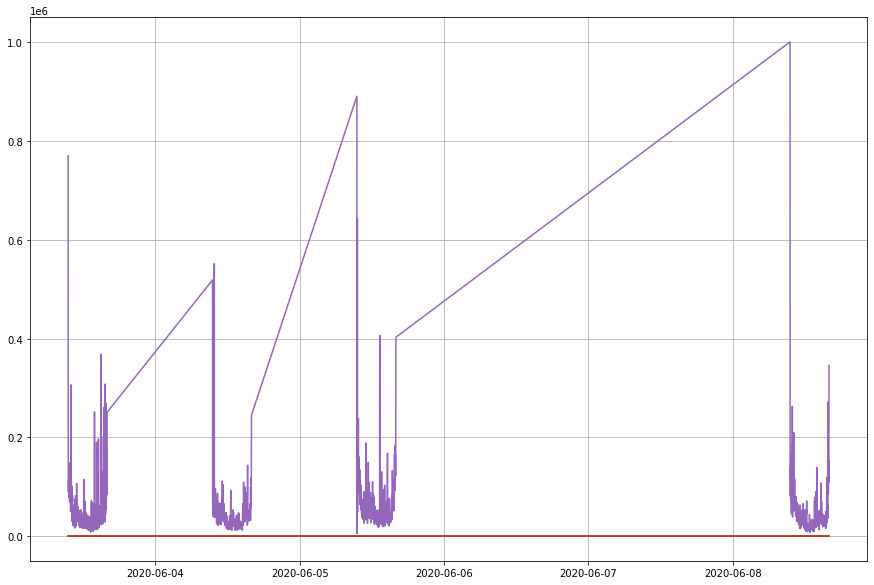

In [65]:
plt.figure(figsize = [15,10])
plt.grid()
plt.plot(data_av)

In [66]:
datayf = fetch_yfinance(ticker=ticker,period='max',interval='1d')
datayf.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.405683,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.384517,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.356296,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.365115,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.375698,18362400


In [67]:
print(datay["Open"])
print(datayf["Open"])
print(dataq["Open"])
print(dataav["1. open"])
print(data_av['1. open'])

Date
1980-12-12      0.513393
1980-12-15      0.488839
1980-12-16      0.453125
1980-12-17      0.462054
1980-12-18      0.475446
                 ...    
2020-06-01    317.750000
2020-06-02    320.750000
2020-06-03    324.660004
2020-06-04    324.390015
2020-06-05    323.350006
Name: Open, Length: 9954, dtype: float64
Date
1980-12-12      0.513393
1980-12-15      0.488839
1980-12-16      0.453125
1980-12-17      0.462054
1980-12-18      0.475446
                 ...    
2020-06-03    324.660004
2020-06-04    324.390015
2020-06-05    323.350006
2020-06-08    330.250000
2020-06-09    332.140015
Name: Open, Length: 9956, dtype: float64
Date
1980-12-12     28.75
1980-12-15     27.38
1980-12-16     25.37
1980-12-17     25.87
1980-12-18     26.63
               ...  
2018-03-21    175.04
2018-03-22    170.00
2018-03-23    168.39
2018-03-26    168.07
2018-03-27    173.68
Name: Open, Length: 9400, dtype: float64
date
2020-06-08    330.250
2020-06-05    323.350
2020-06-04    324.390
2020-06-03

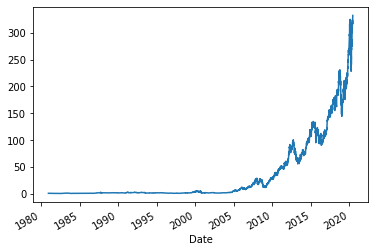

In [68]:
datayf['Open'].plot()

In [69]:
datayf.size

59736

In [70]:
print(datayf.isna())

             Open   High    Low  Close  Adj Close  Volume
Date                                                     
1980-12-12  False  False  False  False      False   False
1980-12-15  False  False  False  False      False   False
1980-12-16  False  False  False  False      False   False
1980-12-17  False  False  False  False      False   False
1980-12-18  False  False  False  False      False   False
...           ...    ...    ...    ...        ...     ...
2020-06-03  False  False  False  False      False   False
2020-06-04  False  False  False  False      False   False
2020-06-05  False  False  False  False      False   False
2020-06-08  False  False  False  False      False   False
2020-06-09  False  False  False  False      False   False

[9956 rows x 6 columns]


In [72]:
start = '1980-01-01'
end = '2020-06-09'
ticker = 'AAPL'
dataq = fetch_quandl(start,end,ticker=ticker)
datayf = fetch_yfinance(ticker=ticker,period='max',interval='1d')
data_av = fetch_alpvantage(ticker)
dataav = fetch_alpvantage_daily(ticker)

print(datayf["Open"])
print(dataq["Open"])
print(dataav["1. open"])
print(data_av['1. open'])

[*********************100%***********************]  1 of 1 completed
{'1. Information': 'Intraday (1min) open, high, low, close prices and volume', '2. Symbol': 'AAPL', '3. Last Refreshed': '2020-06-08 16:00:00', '4. Interval': '1min', '5. Output Size': 'Full size', '6. Time Zone': 'US/Eastern'}
{'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2020-06-08', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}
Date
1980-12-12      0.513393
1980-12-15      0.488839
1980-12-16      0.453125
1980-12-17      0.462054
1980-12-18      0.475446
                 ...    
2020-06-03    324.660004
2020-06-04    324.390015
2020-06-05    323.350006
2020-06-08    330.250000
2020-06-09    332.140015
Name: Open, Length: 9956, dtype: float64
Date
1980-12-12     28.75
1980-12-15     27.38
1980-12-16     25.37
1980-12-17     25.87
1980-12-18     26.63
               ...  
2018-03-21    175.04
2018-03-22    170.00
2018-03-23    168.39

## Current Prices
Fetch the current price of the stock

In [73]:
def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

def fetch_fmodel(ticker='AAPL'):
    url = ("https://financialmodelingprep.com/api/v3/stock/real-time-price/" + ticker + "?apikey=dd9d15233483a78b8ea49e315800099c")
    return get_jsonparsed_data(url)

In [74]:
print(fetch_fmodel())

{'symbol': 'AAPL', 'price': 338.53}
